# Проект: Линейные модели в машинном обучении

**ЦЕЛЬ ПРОЕКТА** : помощь молочному хозяйству при покупке животных с помощью модели машинного обучения.

**ЗАДАЧИ ПРОЕКТА** :
1. Загрузка и изучение данных
2. Предобработка данных
- Проверить данные на наличие пропусков и дубликатов. 
- Узнать, корректны ли типы данных у каждого признака. При необходимости устранить все проблемы с данными.
3. Исследовательский анализ данных
- Провести статистический анализ всех признаков.
- Построить графики для каждого признака.
4. Провести корреляционный анализ признаков в датасете ferma_main.csv
- Изучить взаимосвязь между признаками: рассчитать коэффициенты корреляции между всеми признаками.
- Построить диаграммы рассеяния scatterplot для признака  Удой, кг и всех количественных признаков с учётом значения категориальных признаков.
5. Задача регрессии
- Обучить три модели линейной регрессии
- Сравнить качество трёх моделей линейной регрессии, сопоставить их R² и остатки
- Оценить качество каждой модели по трём метрикам: MSE, MAE, RMSE.
- C помощью помеди спрогнозировать удой коров среди тех, которые выбраны для покупки.
6. Задача классификации
- Подготовить данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Проанализируйте модель логистической регрессии.
- С помощью обученной модели спрогнозировать вкус молока коров, которых фермер хочет купить.
7. Отбор коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

Работа будет осуществляться в трех датасетах:
- ferma_main.csv
- ferma_dad.cvs
- cow_buy.csv

В файле ferma_main.csv содержит данные о стаде фермера на текущий момент.
Описание данных:
- id - уникальный идентификатор коровы
- Удой, кг - масса малока, которую короыв дает в год(в килограммах)
- ЭКЕ (Энергетическая кормовая единица) - показатль питательности корма коровы
- Сырой протеин, г - содержание сырого протеина в корме (в граммах)
- СПО (Сахаро-протеиновое соотношение) - отношение сахара к протеину в корме коровы
- Порода - порода коровы
- Тип пастбища - ландшафт лугов, на которых послась корова
- порода папы_быка - порода папы быка
- Жирность,% - содержание жиров в молоке (в порцентах)
- Белок,% - содержание жиров в молоке (в процентах)
- Вкус молока - оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)
- Возраст - возраст коровы, бинарный признак(менее_2_лет, более_2_лет)

Файл ferma.dad.csv хранит имя папы каждой коровы в стаде фермера.
Описание данных:
- id - уникальный идентификатор коровы
- Имя Папы - имя папы коровы

Файл cow_buy.csv  - это данные о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой.
Описание данных:
- Порода - порода коровы
- Тип пастбища - ландшафт лугов, на которых паслась коровы
- порода папы_быка - порода папы коровы
- Имя_папы - имя папы коровы
- Текущая_жирность,% - содержание жиров в молоке на данный момент (в процениах)
- Текущий_уровень_белок,% - содержание белков в молоке на данный момент (в процентах)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 1. Загрузка данных
На этапе загрузки данных необходимо:
1. Прочитать и записать все файлы, которые даны для работы. Во время записи данные должны быть представлены в виде таблицы.
2. После прочтения данных провести редакцию названия столбцов, если она необходима. В редактирование входит: избавление от заглавных букв, пробелов и навание столбцов должно быть представлено на английском языке.

In [2]:
data_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')

In [3]:
#display(data_main.head())

In [4]:
#print (data_main.columns) 

In [5]:
data_main = data_main.rename(
    columns ={'Удой, кг' : 'yield_of_milk'
              ,'ЭКЕ (Энергетическая кормовая единица)' : 'e_f_u'
             ,'Сырой протеин, г' : 'crude_protein'
             ,'СПО (Сахаро-протеиновое соотношение)' : 's_p_r'
             ,'Порода' : 'breed'
             ,'Тип пастбища' : 'grassland'
             ,'порода папы_быка' : 'bull_breed'
             ,'Жирность,%' : 'milk_fat'
             ,'Белок,%' : 'protein_in_milk'
             ,'Вкус молока' : 'milk_tastes'
             ,'Возраст' : 'age'})
display(data_main.head())

,id,yield_of_milk,e_f_u,crude_protein,s_p_r,breed,grassland,bull_breed,milk_fat,protein_in_milk,milk_tastes,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [6]:
data_ferma = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')

In [7]:
#display(data_ferma.head())

In [8]:
#print (data_ferma.columns) 

In [9]:
data_ferma = data_ferma.rename(columns ={'Имя Папы' : 'bull_name'})
display(data_ferma.head())

,id,bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
data_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [11]:
#display(data_buy.head())

In [12]:
#print (data_buy.columns) 

In [13]:
data_buy = data_buy.rename(
    columns ={'Порода' : 'breed'
             ,'Тип пастбища' : 'grassland'
             ,'порода папы_быка' : 'bull_breed'
             ,'Имя_папы' : 'bull_name'
             ,'Текущая_жирность,%' : 'milk_fat_now'
             ,'Текущий_уровень_белок,%' : 'protein_in_milk_now'
             ,'Возраст' : 'age'})
display(data_buy.head())

,breed,grassland,bull_breed,bull_name,milk_fat_now,protein_in_milk_now,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


## Вывод:
На начальном этапе знакомства с предоставленной информацией данные были прочитаны и записаны. Также были изменены названия столбцов (переименовка всех столбцов с русского на английский язык, были удалены кг и % в названиях, все названия записаны со строчной буквы) для дальнейшего удобства с данными.

##  2. Предобработка данных
Для работы с данными необходимо провести их предобработку. Для каждого файла проверить на наличие пропусков и дубликатов и если есть их наличие - избавиться от них по возможности. Также проверить на тип данных, если необходимо - исправить его.

#### 2.1 Работа с файлом "/datasets/ferma_main.csv"

In [14]:
#print(data_main.info())

In [15]:
data_main['e_f_u'] = data_main['e_f_u'].str.replace(',','.').astype(float)
data_main['s_p_r'] = data_main['s_p_r'].str.replace(',','.').astype(float)
data_main['milk_fat'] = data_main['milk_fat'].str.replace(',','.').astype(float)
data_main['protein_in_milk'] = data_main['protein_in_milk'].str.replace(',','.').astype(float)
data_main.dtypes

id                   int64
yield_of_milk        int64
e_f_u              float64
crude_protein        int64
s_p_r              float64
breed               object
grassland           object
bull_breed          object
milk_fat           float64
protein_in_milk    float64
milk_tastes         object
age                 object
dtype: object

In [16]:
print (data_main['breed'].unique())
print (data_main['grassland'].unique())
print (data_main['bull_breed'].unique())
print (data_main['milk_tastes'].unique())
print (data_main['age'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [17]:
print('Количество дубликотов строк в data_main :',data_main.duplicated().sum())
print ('Процент дубликатов строк от всего количества строк',round(data_main.duplicated().sum() / data_main.shape[0]* 100,1))

Количество дубликотов строк в data_main : 5
Процент дубликатов строк от всего количества строк 0.8


In [18]:
data_main = data_main.drop_duplicates().reset_index(drop = True)
print('Количество дубликотов строк в data_main после удаления строк:',data_main.duplicated().sum())
print('Количество строк в data_main после удаления строк:',data_main.shape[0])

Количество дубликотов строк в data_main после удаления строк: 0
Количество строк в data_main после удаления строк: 629


In [19]:
print (data_main['breed'].unique())
print (data_main['grassland'].unique())
print (data_main['bull_breed'].unique())
print (data_main['milk_tastes'].unique())
print (data_main['age'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [20]:
data_main['breed'] = data_main['breed'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
data_main['grassland'] = data_main['grassland'].str.replace('Равнинные', 'равнинное')
data_main['grassland'] = data_main['grassland'].str.replace('Равнинное', 'равнинное')
data_main['grassland'] = data_main['grassland'].str.replace('Холмистое', 'холмистое')
data_main['bull_breed'] = data_main['bull_breed'].str.replace('Айдиалл', 'Айдиал')

In [21]:
print (data_main['breed'].unique())
print (data_main['grassland'].unique())
print (data_main['bull_breed'].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['равнинное' 'холмистое']
['Айдиал' 'Соверин']


#### Вывод по данным data_main:
1. был изменен тип данных object в столбцах 'e_f_u', 's_p_r', 'milk_fat', 'protein_in_milk' на float.
2. не было обнаружено пропусков данных.
3. было обнаружено 5 строк дубликатов, поскольку это составляет менее 1% от всех данных, было принято решение удалить данные строки. На текущий этап количество строк равно 629.
4. была совершена проверка на дубликаты в столбцах 'breed', 'grassland' и 'bull_breed', все выявленные дубликаты были исправлены.

#### 2.2 Работа с файлом "/datasets/ferma_dad.csv"

In [22]:
print(data_ferma.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   bull_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


In [23]:
print(data_ferma.isna().sum())

id           0
bull_name    0
dtype: int64


In [24]:
print('Количество дубликотов строк в data_ferma :',data_ferma.duplicated().sum())
print ('Процент дубликатов строк от всего количества строк',round(data_ferma.duplicated().sum() / data_ferma.shape[0]* 100,1))

Количество дубликотов строк в data_ferma : 0
Процент дубликатов строк от всего количества строк 0.0


In [25]:
print (data_ferma['bull_name'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [26]:
print('Количество строк :',data_ferma.shape[0])

Количество строк : 629


#### Вывод по данным data_ferma:
1. все данные представлены в правильных типах.
2. не было обнаружено пропусков данных.
3. не было обнаружено дубликатов данных.
4. не было обнаружено дубликатов в столбце 'bull_name'.
5. итоговое количество строк равно 629, что совпадает с данными data_main.

#### 2.3 Работа с файлом "/datasets/cow_buy.csv"

In [27]:
print(data_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   breed                20 non-null     object
 1   grassland            20 non-null     object
 2   bull_breed           20 non-null     object
 3   bull_name            20 non-null     object
 4   milk_fat_now         20 non-null     object
 5   protein_in_milk_now  20 non-null     object
 6   age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


In [28]:
data_buy['milk_fat_now'] = data_buy['milk_fat_now'].str.replace(',','.').astype(float)
data_buy['protein_in_milk_now'] = data_buy['protein_in_milk_now'].str.replace(',','.').astype(float)
data_buy.dtypes

breed                   object
grassland               object
bull_breed              object
bull_name               object
milk_fat_now           float64
protein_in_milk_now    float64
age                     object
dtype: object

In [29]:
print(data_buy.isna().sum())

breed                  0
grassland              0
bull_breed             0
bull_name              0
milk_fat_now           0
protein_in_milk_now    0
age                    0
dtype: int64


In [30]:
print('Количество дубликотов строк в data_buy :',data_buy.duplicated().sum())
print ('Процент дубликатов строк от всего количества строк',round(data_buy.duplicated().sum() / data_buy.shape[0]* 100,1))
print('Количество строк :',data_buy.shape[0])

Количество дубликотов строк в data_buy : 4
Процент дубликатов строк от всего количества строк 20.0
Количество строк : 20


In [31]:
display(data_buy[data_buy.duplicated() == True])

,breed,grassland,bull_breed,bull_name,milk_fat_now,protein_in_milk_now,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [32]:
print (data_buy['breed'].unique())
print (data_buy['grassland'].unique())
print (data_buy['bull_breed'].unique())
print (data_buy['bull_name'].unique())
print (data_buy['age'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


In [33]:
data_buy['breed'] = data_buy['breed'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
print (data_buy['breed'].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']


#### Вывод по данным data_buy:
1. был изменен тип данных object в столбцах 'milk_fat_now', 'protein_in_milk_now' на float.
2. не было обнаружено пропусков данных.
3. было обнаружено 4 строк дубликатов, поскольку это составляет менее 20% от всех данных, было принято решение не удалить данные строки(это могут быть разные коровы). На текущий этап количество строк равно 20.
4. была совершена проверка на дубликаты в столбцах 'breed', 'grassland' и 'bull_breed','bull_name', 'age', все выявленные дубликаты были исправлены.

### Вывод по предобработке даных.
Для всех данных была совершена преобработка данных (изменение типов данных, устранение дубликатов, пропуски отсутствовали). После предобработки данных количество строк в данных из data_main и data_farme равно 629, количество строк в данных data_buy равно 20 (было принято решение не удалять дубликаты, поскольку это могут быть разные коровы).

## Исследовательский анализ данных

Следующий этап в работе данных является статистический анализ всех признаков с целью их описания и определения наличия аномалий в данных.

#### Исследовательский анализ данных data_main

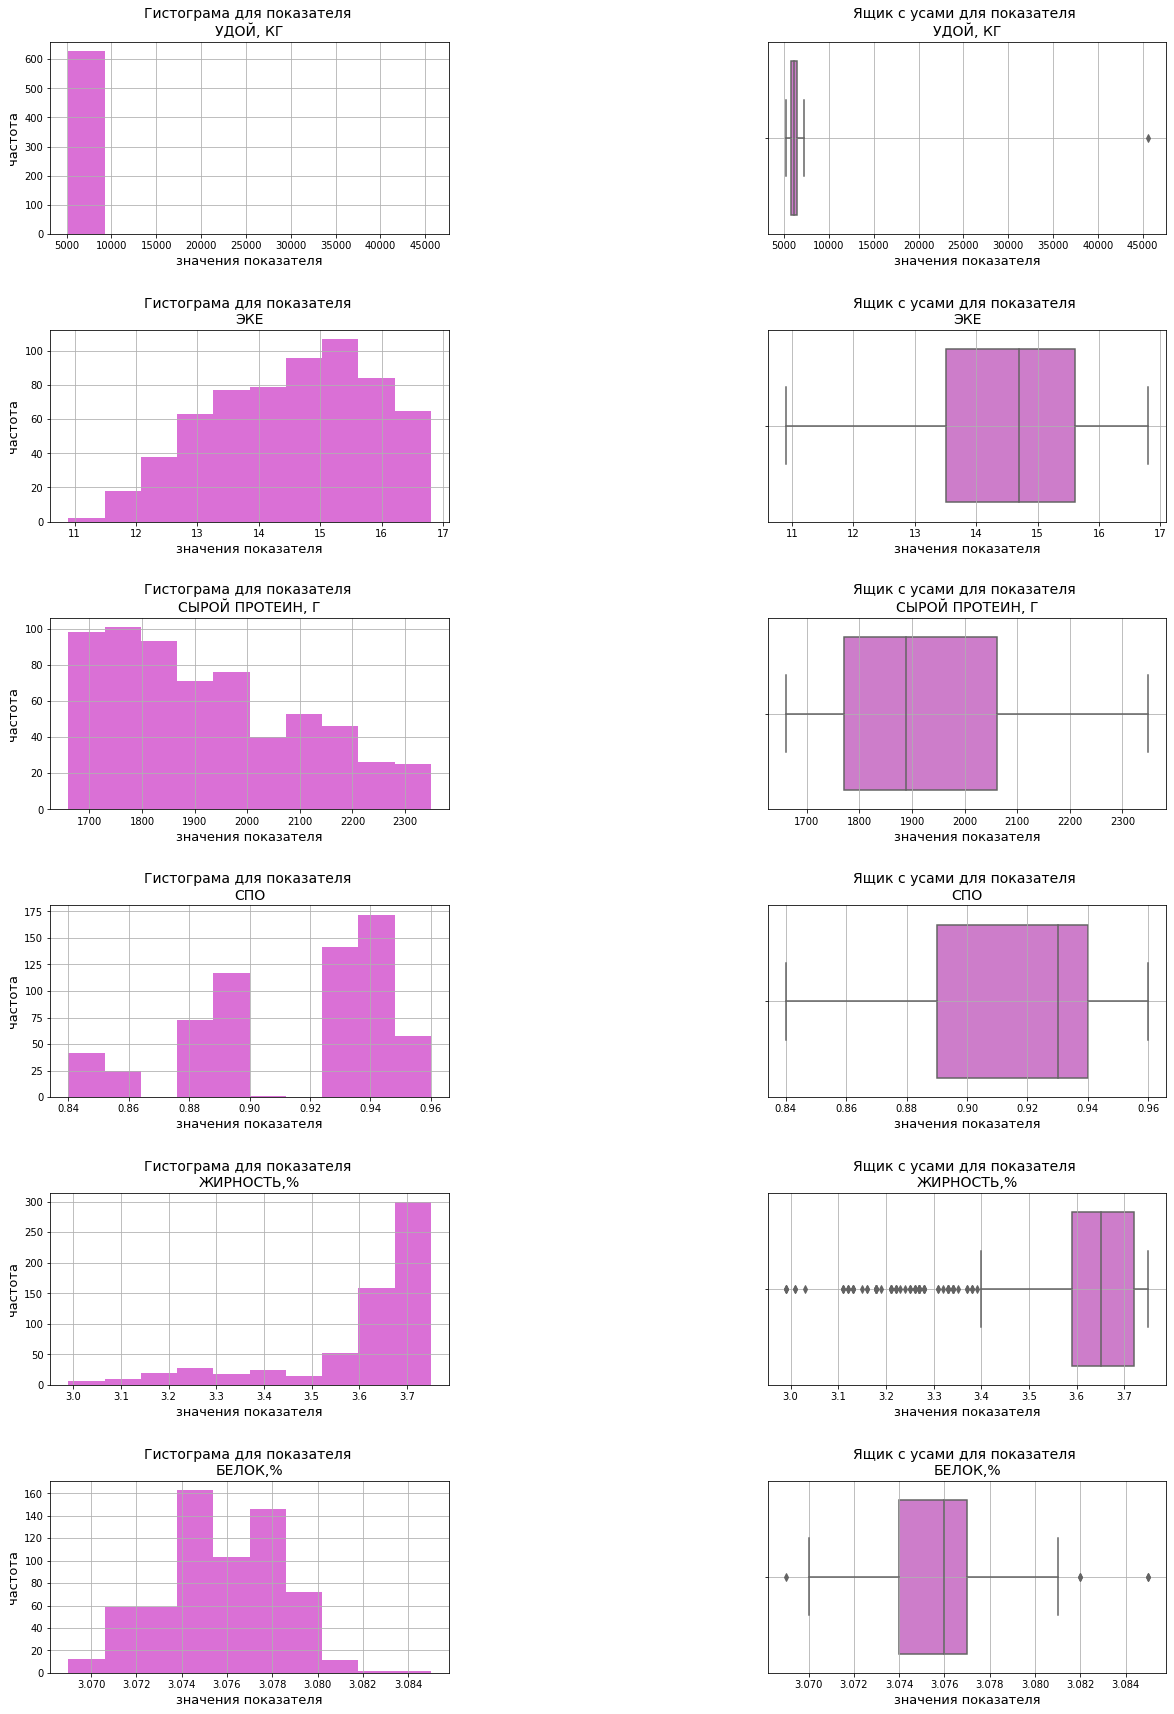

In [34]:
position = 0
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.8, hspace=0.5)

list = ['yield_of_milk', 'e_f_u', 'crude_protein', 's_p_r', 'milk_fat', 'protein_in_milk']
list_1 = ['УДОЙ, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%' ]

for name in list:
    position += 1
    
    df1 = data_main[name]
    name_1 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    df1.plot(kind = 'hist', color = 'orchid')
    plt.title(f'Гистограма для показателя \n{name_1.upper()}', fontsize=14)
    plt.xlabel('значения показателя', fontsize=13)
    plt.ylabel('частота', fontsize=13)
    plt.grid(True)
    
    position += 1
    df2 = data_main[name]
    name_2 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    sns.boxplot(x= df2,color = 'orchid')
    plt.title(f'Ящик с усами для показателя \n{name_2.upper()}', fontsize=14)
    plt.xlabel('значения показателя',fontsize=13 )
    plt.grid(True);

В значениях yiedl_of_milk есть аномалия в виде одного значения. Необходимо удалить данную строку и перестроить графики. Также удалить данную строку из данных data_farme. После удаления сравнить количества строк в данных.

In [35]:
display(data_main.query('yield_of_milk > 45000'))

,id,yield_of_milk,e_f_u,crude_protein,s_p_r,breed,grassland,bull_breed,milk_fat,protein_in_milk,milk_tastes,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [36]:
data_main = data_main.query('yield_of_milk != 45616')
data_ferma = data_ferma.query('id != 17')

In [37]:
print('Количество строк в data_main:',data_main.shape[0])
print('Количество строк в data_ferma:',data_ferma.shape[0])

Количество строк в data_main: 628
Количество строк в data_ferma: 628


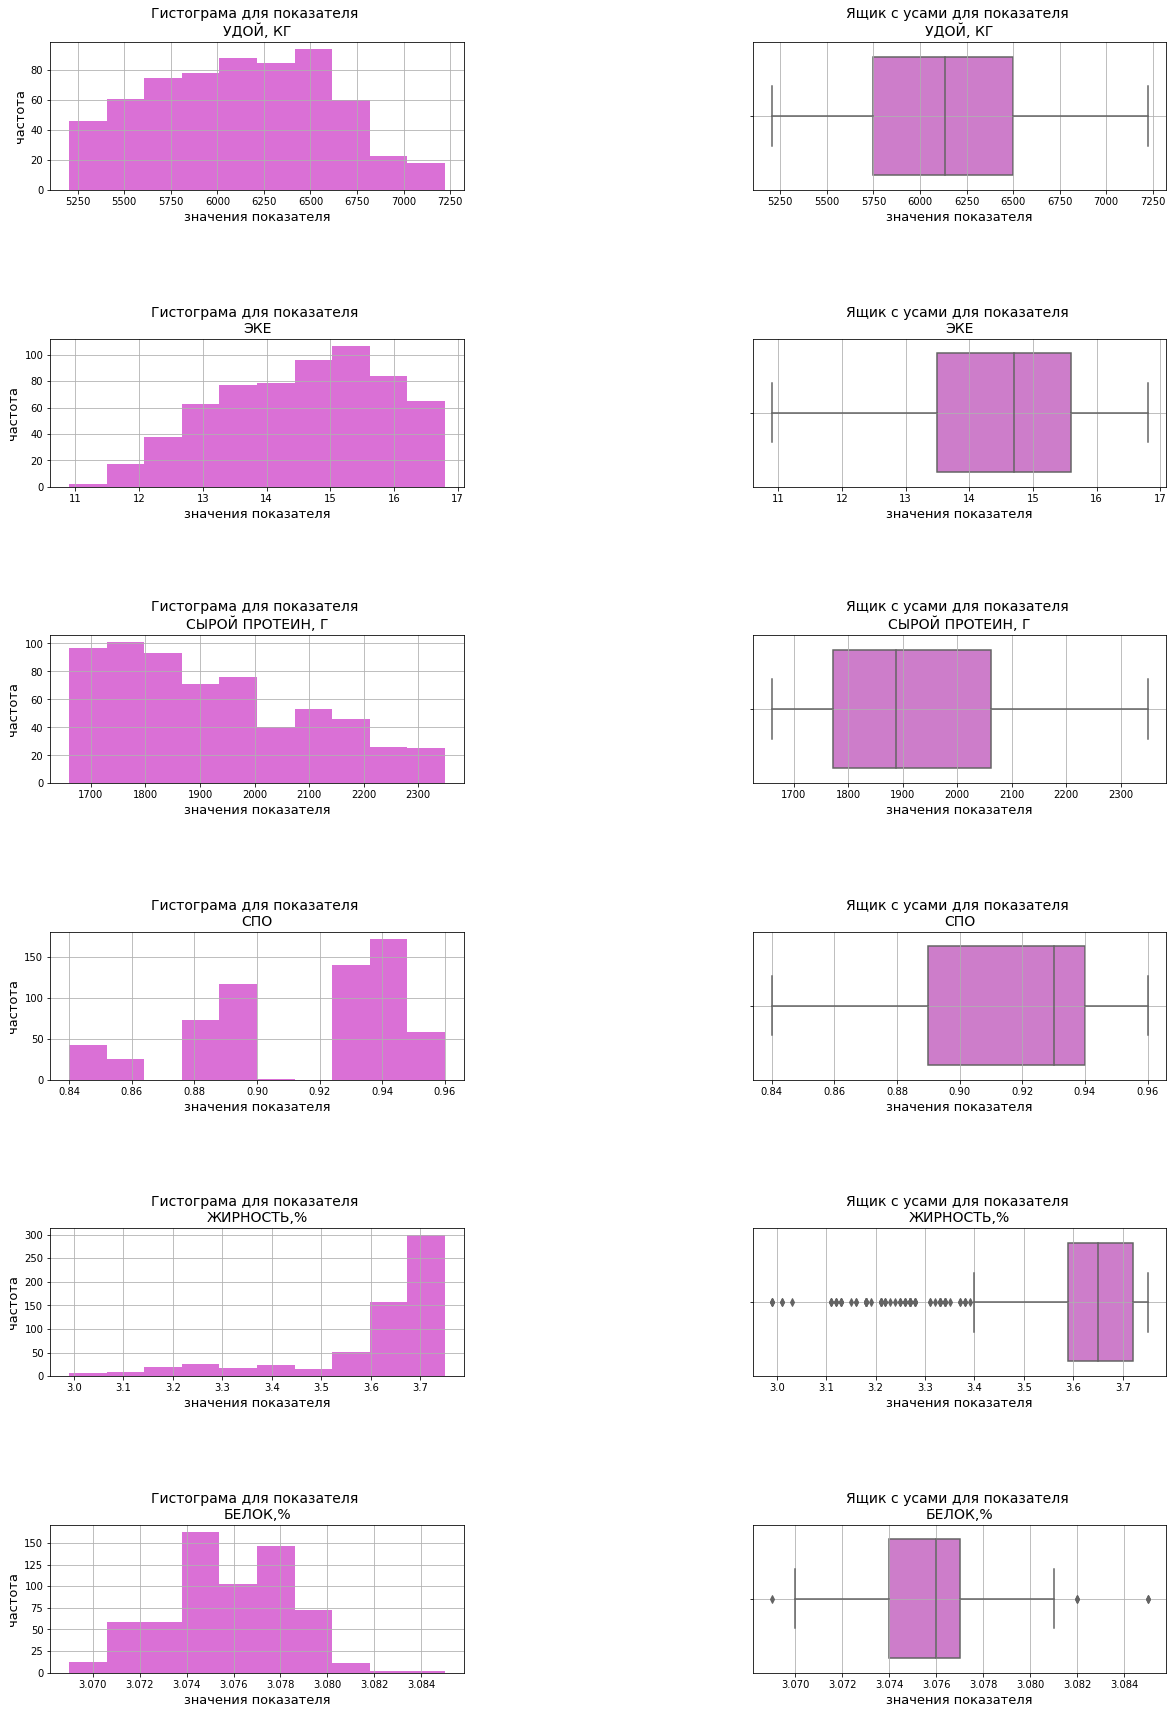

In [38]:
position = 0
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.7, hspace=1)

list = ['yield_of_milk', 'e_f_u', 'crude_protein', 's_p_r', 'milk_fat', 'protein_in_milk']
list_1 = ['УДОЙ, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%' ]

for name in list:
    position += 1
    
    df1 = data_main[name]
    name_1 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    df1.plot(kind = 'hist', color = 'orchid')
    plt.title(f'Гистограма для показателя \n{name_1.upper()}', fontsize=14)
    plt.xlabel('значения показателя', fontsize=13)
    plt.ylabel('частота', fontsize=13)
    plt.grid(True)
    
    position += 1
    df2 = data_main[name]
    name_2 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    sns.boxplot(x= df2,color = 'orchid')
    plt.title(f'Ящик с усами для показателя \n{name_2.upper()}', fontsize=14)
    plt.xlabel('значения показателя',fontsize=13 )
    plt.grid(True);

In [39]:
list = ['yield_of_milk', 'e_f_u', 'crude_protein', 's_p_r', 'milk_fat', 'protein_in_milk']
list_1 = ['УДОЙ, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%' ]

for name in list:
    df1 = data_main[name]
    name_1 = list_1[list.index(name)]
    print(f'Характеристики количественного показателя {name_1.upper()}')
    print(df1.describe(),'\n')

Характеристики количественного показателя УДОЙ, КГ
count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_of_milk, dtype: float64 

Характеристики количественного показателя ЭКЕ
count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: e_f_u, dtype: float64 

Характеристики количественного показателя СЫРОЙ ПРОТЕИН, Г
count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein, dtype: float64 

Характеристики количественного показателя СПО
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: s_p_r, dtype: float64 

Характ

#### Вывод по количественным признакам из данных data_main:
1. Для характеристики "Удой" среднее значение равно 6126 кг, диапазон от 5750 кг до 6500 кг.
2. Для характеристики "ЭКЕ" среднее значение равно 14.5, диапазон от 13.5 до 15.6
3. Для характеристики "Сырой протеин" среднее значение равно 1924 г, диапазон от 1772 г до 2062 г. 
4. Для характеристики "СПО" среднее значение 0.91, диапазон от 0.89 до 0.94. Но на гистограмме наблюдается два пропуска между 0.86 и 0.88 и 0.9 и 0.93. 
5. Для характеристики "Жирность" среднее значение равно 3.6%, диапазон от 3.59% до 3.72%. Также наблюдается большое количество выбросов.
6. Для характеристики "Белок" среднее значение равно 3.076%, диапазон от 3.069% до 3.077%. Также наблюдается небольшое количество выбровов.

<Figure size 1440x5400 with 0 Axes>

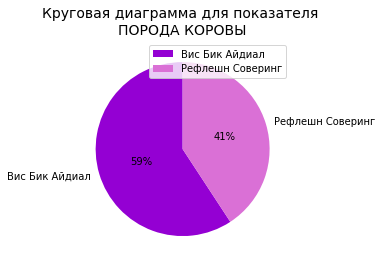

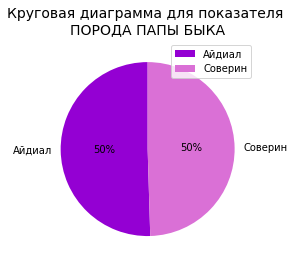

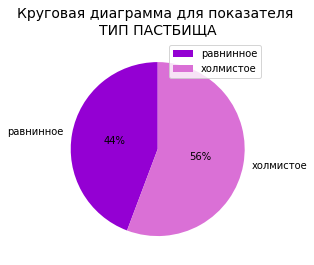

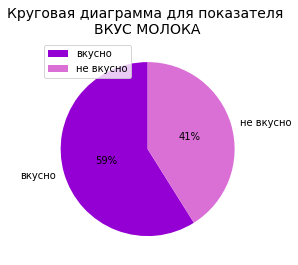

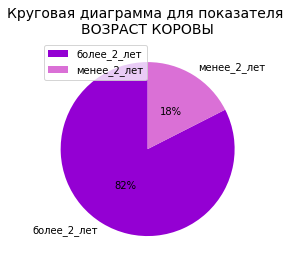

In [40]:
position = 0
plt.figure(figsize=[20,75]);
plt.subplots_adjust(wspace=0.5, hspace=1.0);

list = ['breed', 'bull_breed', 'grassland', 'milk_tastes', 'age']
list_1 = ['порода коровы', 'порода папы быка', 'тип пастбища', 'вкус молока', 'возраст коровы']

for name in list:
    position += 1
    df1 = data_main.pivot_table(index = name, values = 'id', aggfunc = 'count')
    name_1 = list_1[list.index(name)]
    df1.plot(kind = 'pie',subplots=True,autopct='%.0f%%',colors=["darkviolet", 'orchid'],startangle=90, pctdistance=0.5);
    plt.title(f'Круговая диаграмма для показателя \n{name_1.upper()}', fontsize=14);
    plt.ylabel("");
    plt.show();

#### Вывод по категорическим признакам из данных data_main:
1. Для характеристики "Порода коровы" преобладает порода "Вис Бик Айдифл"
2. Для характеристики "Порода папы быка" нет лидера, распределено поровну.
3. Для характеристики "Тип пастбища" преобладает холмистое пастбище. 
4. Для характеристики "Вкус молока" преобладает вкусное молоко. 
5. Для характеристики "Возраст коровы" преобладает возраст более 2 лет.

Данные характеристики, практически, поровну распределены между собой.

#### Исследовательский анализ данных data_ferma

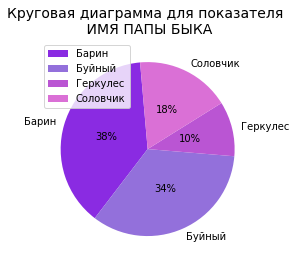

In [41]:
df1 = data_ferma.pivot_table(index = 'bull_name', values = 'id', aggfunc = 'count')
df1.plot(
    kind = 'pie'
    ,subplots=True
    ,autopct='%.0f%%'
    ,colors=[ 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid']
    ,startangle=95
    ,pctdistance=0.5);
plt.title(f'Круговая диаграмма для показателя \n ИМЯ ПАПЫ БЫКА', fontsize=14);
plt.ylabel("");
plt.show();

#### Вывод по данным из data_ferma:
Больше всего быко преобладает с кличкой "Барин", меньше всего - "Геркулес".

#### Исследовательский анализ данных data_buy

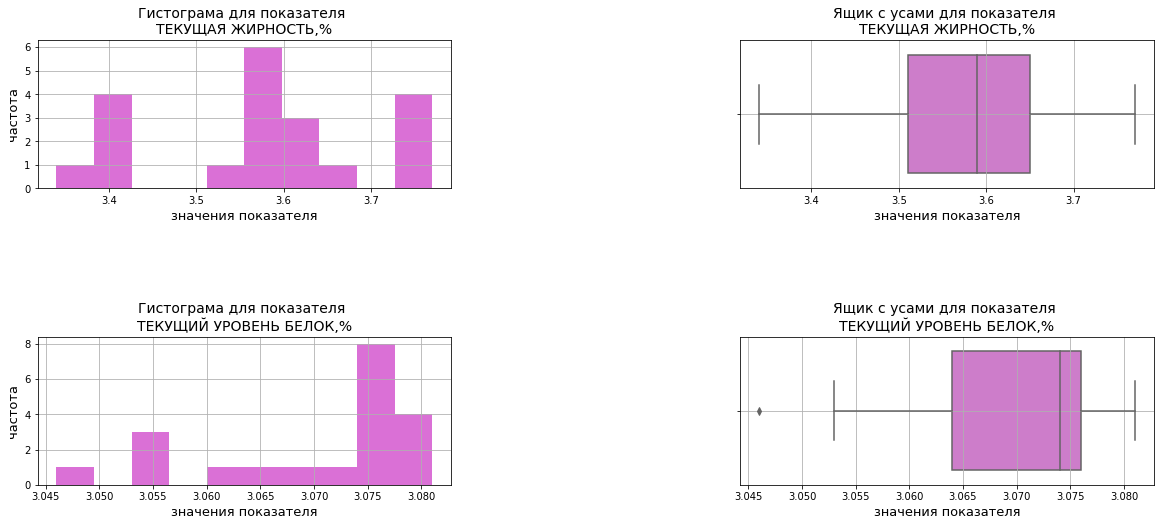

In [42]:
position = 0
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.7, hspace=1)

list = ['milk_fat_now', 'protein_in_milk_now']
list_1 = ['Текущая жирность,%', 'Текущий уровень белок,%']

for name in list:
    position += 1
    
    df1 = data_buy[name]
    name_1 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    df1.plot(kind = 'hist', color = 'orchid')
    plt.title(f'Гистограма для показателя \n{name_1.upper()}', fontsize=14)
    plt.xlabel('значения показателя', fontsize=13)
    plt.ylabel('частота', fontsize=13)
    plt.grid(True)
    
    position += 1
    df2 = data_buy[name]
    name_2 = list_1[list.index(name)]
    plt.subplot(6, 2, position)
    sns.boxplot(x= df2,color = 'orchid')
    plt.title(f'Ящик с усами для показателя \n{name_2.upper()}', fontsize=14)
    plt.xlabel('значения показателя',fontsize=13 )
    plt.grid(True);

In [43]:
list = ['milk_fat_now', 'protein_in_milk_now']
list_1 = ['Текущая жирность,%', 'Текущий уровень белок,%']

for name in list:
    df1 = data_buy[name]
    name_1 = list_1[list.index(name)]
    print(f'Характеристики количественного показателя {name_1.upper()}')
    print(df1.describe(),'\n')

Характеристики количественного показателя ТЕКУЩАЯ ЖИРНОСТЬ,%
count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: milk_fat_now, dtype: float64 

Характеристики количественного показателя ТЕКУЩИЙ УРОВЕНЬ БЕЛОК,%
count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein_in_milk_now, dtype: float64 



#### Вывод количественных признаков данных data_buy:
1. Для характеристики "Текущая жирность" среднее значение равно 3.57%, диапазон от 3.51% до 3.65%. Не наблюдается выбросов.
6. Для характеристики "Текущий уровень белка" среднее значение равно 3.069%, диапазон от 3.064% до 3.076%. Наблюдается один выброс.

<Figure size 1440x5400 with 0 Axes>

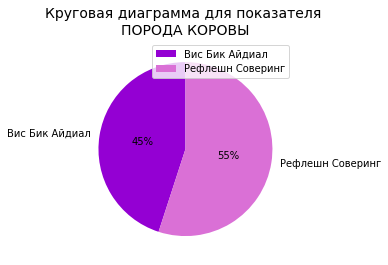

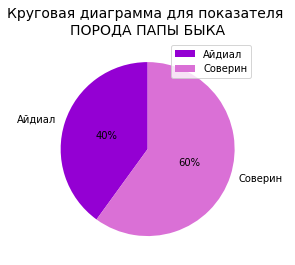

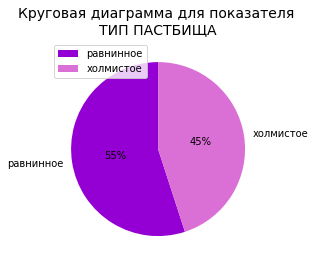

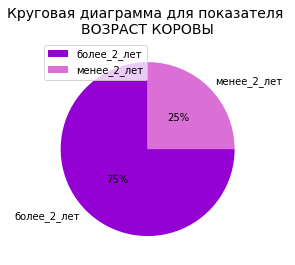

In [44]:
position = 0
plt.figure(figsize=[20,75]);
plt.subplots_adjust(wspace=0.5, hspace=1.0);

list = ['breed', 'bull_breed', 'grassland','age']
list_1 = ['порода коровы', 'порода папы быка', 'тип пастбища','возраст коровы']

for name in list:
    position += 1
    df1 = data_buy.pivot_table(index = name, values = 'milk_fat_now', aggfunc = 'count')
    name_1 = list_1[list.index(name)]
    df1.plot(kind = 'pie',subplots=True,autopct='%.0f%%',colors=["darkviolet", 'orchid'],startangle=90, pctdistance=0.5);
    plt.title(f'Круговая диаграмма для показателя \n{name_1.upper()}', fontsize=14);
    plt.ylabel("");
    plt.show();

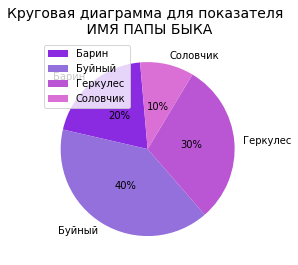

In [45]:
df1 = data_buy.pivot_table(index = 'bull_name', values = 'milk_fat_now', aggfunc = 'count')
df1.plot(
    kind = 'pie'
    ,subplots=True
    ,autopct='%.0f%%'
    ,colors=[ 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid']
    ,startangle=95
    ,pctdistance=0.5);
plt.title(f'Круговая диаграмма для показателя \n ИМЯ ПАПЫ БЫКА', fontsize=14);
plt.ylabel("");
plt.show();

#### Вывод по категорическим признакам из данных data_main:
1. Для характеристики "Порода коровы" преобладает порода "Рефлешн Соверинг"
2. Для характеристики "Порода папы быка" преобладает порода "Соверин".
3. Для характеристики "Тип пастбища" преобладает равнинное пастбище. 
4. Для характеристики "Возраст коровы" преобладает возраст более 2 лет.
5. Для характеристики "Имя папы быка" преобладает кличка "Буйный", меньше всего - "Соловчик".

Нельзя уточнять, что данные характеристики, практически, поровну распределены между собой.

### Вывод по исследовательскому анализу данных.
Исследовательский анализ данных о стаде фермера и "ЭкоФермы" показал,что:
1. жирность молока в молочном хозяйстве фермера(от 3.59% до 3.72%) немного больше, чем в "ЭкоФерме"(от 3.51% до 3.65%).
2. содержание белка в молоке коров фермера (от 3.069% до 3.077%) сопоставимо с "Экофермой"(от 3.064% до 3.076%).
3. В столбце 'Удой_кг'('yield_of_milk') датафрейма data_main был обнаружен и удалён один выброс.
4. Из всех количественных признаков нормальное распределение имеет только признак 'Белок, %'('protein_in_milk') в датафрейме data_main.
5. В молочном хозяйстве фермера доля невкусного молока составляет 41 %.
6. По возрастному соотношению в обоих хозяйствах большинство коров возраста более 2 лет (82% в молочном хозяйстве фермера и 75% в "ЭкоФерме").


## Корреляционный анализ
В корреляционном анализе неоходимо расчитать корреляцию между признакамии построить диаграммы рассеивания для для параметра "Удой" и всех количественных признаков с учётом значения категориальных признаков.

In [46]:
data_main_cor = data_main.drop('id',axis = 1).rename(
    columns ={'yield_of_milk' : 'Удой, кг'
             ,'e_f_u' : 'ЭКЕ'
             ,'crude_protein' : 'Сырой протеин, г'
             ,'s_p_r' : 'СПО' 
             ,'milk_fat' : 'Жирность,%'
             , 'protein_in_milk' : 'Белок,%' 
             })

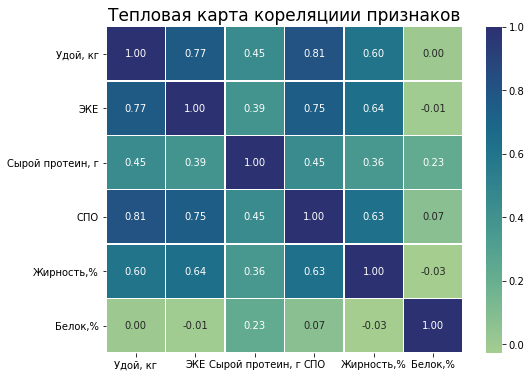

In [47]:
plt.figure(figsize=(8, 6));
sns.heatmap(
    data_main_cor.corr()
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap="crest"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);


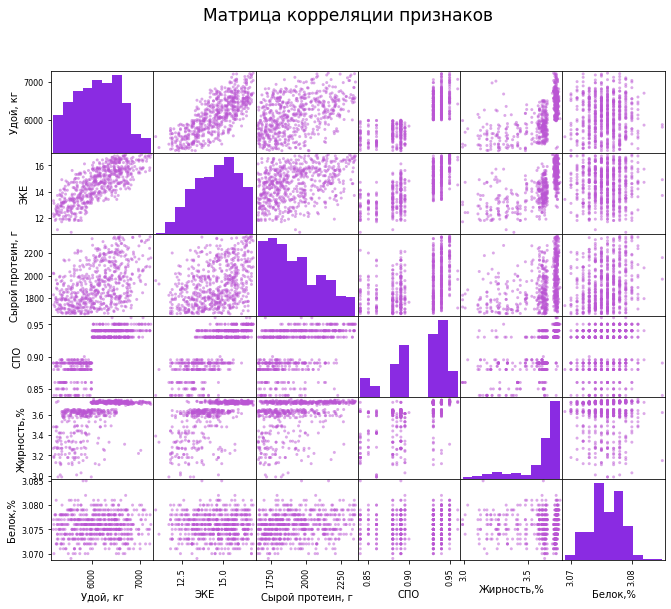

In [48]:
pd.plotting.scatter_matrix(data_main_cor, figsize=(11, 9), alpha=0.5, 
c='mediumorchid', hist_kwds={'color':['blueviolet']});
plt.suptitle('Матрица корреляции признаков', fontsize=17);

#### Вывод: 
Из полученных данных видно, что 
1. на признак "Удой" сильнее всего влияют 2 признака: энергетическая кормовая единица (ЭКЕ) и сахаро-протеиновое соотношение (СПО). 
2. между признаками ЭКЕ и СПО, ЭКЕ и Жирность в %, СПО и Жирность в % существует мультиколлинеарность, от которой в дальнейшем необходмо избавиться.

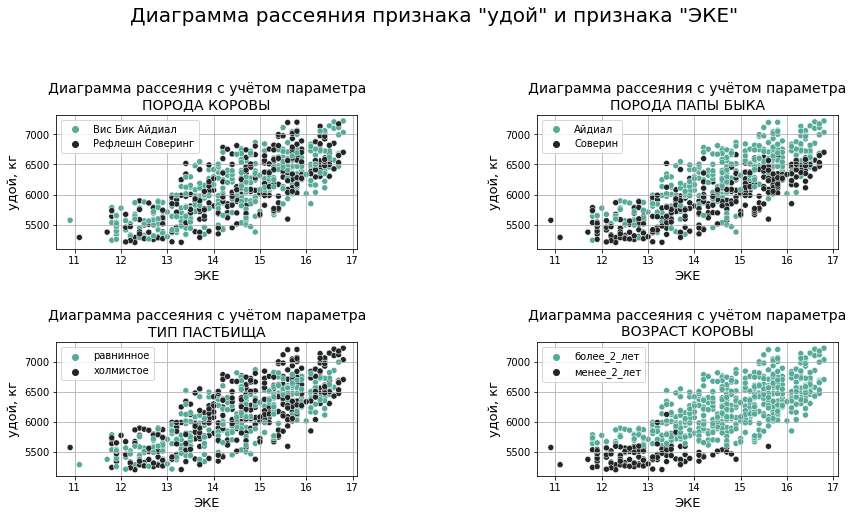

In [49]:
position = 0
plt.figure(figsize=[14,15])
plt.subplots_adjust(wspace=0.6, hspace=0.7)
plt.suptitle('Диаграмма рассеяния признака "удой" и признака "ЭКЕ"',  fontsize=20)

list = ['breed', 'bull_breed', 'grassland','age']
list_1 = ['порода коровы', 'порода папы быка', 'тип пастбища','возраст коровы']

for name in list:
    position += 1
    name_1 = list_1[list.index(name)]
    plt.subplot(4, 2, position)
    sns.scatterplot(x='e_f_u', y='yield_of_milk', data=data_main, palette="dark:#5A9_r", hue=name)
    plt.title(f'Диаграмма рассеяния с учётом параметра\n{name_1.upper()}', fontsize=14)
    plt.xlabel('ЭКЕ', fontsize=13)
    plt.ylabel('удой, кг', fontsize=13)
    plt.legend()
    plt.grid(True)

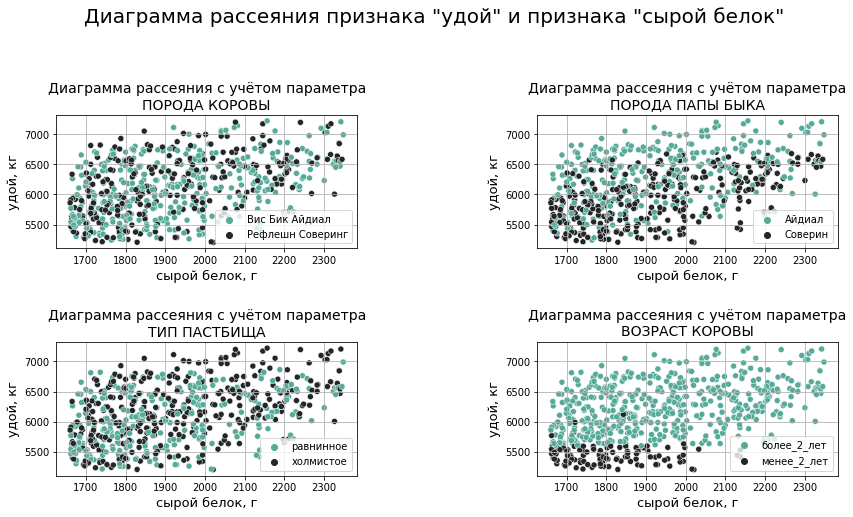

In [50]:
position = 0
plt.figure(figsize=[14,15])
plt.subplots_adjust(wspace=0.6, hspace=0.7)
plt.suptitle('Диаграмма рассеяния признака "удой" и признака "сырой белок"',  fontsize=20)

list = ['breed', 'bull_breed', 'grassland','age']
list_1 = ['порода коровы', 'порода папы быка', 'тип пастбища','возраст коровы']

for name in list:
    position += 1
    name_1 = list_1[list.index(name)]
    plt.subplot(4, 2, position)
    sns.scatterplot(x='crude_protein', y='yield_of_milk', data=data_main, palette="dark:#5A9_r", hue=name)
    plt.title(f'Диаграмма рассеяния с учётом параметра\n{name_1.upper()}', fontsize=14)
    plt.xlabel('сырой белок, г', fontsize=13)
    plt.ylabel('удой, кг', fontsize=13)
    plt.legend()
    plt.grid(True)

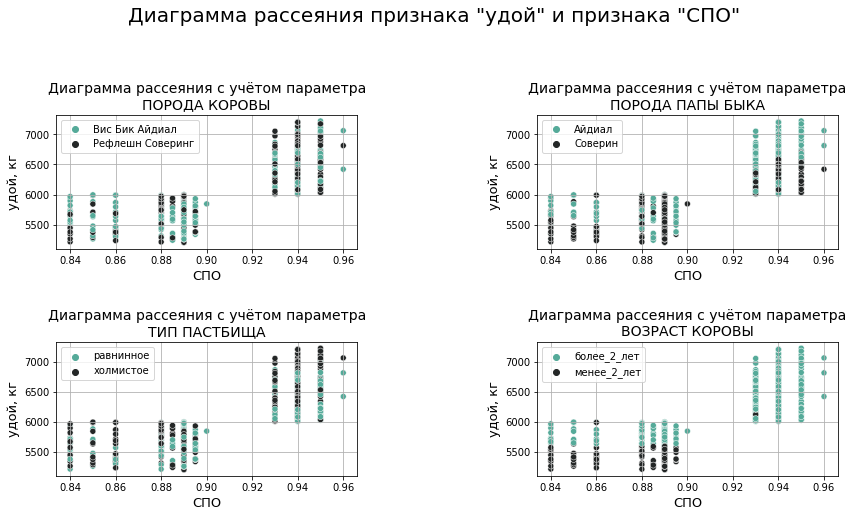

In [51]:
position = 0
plt.figure(figsize=[14,15])
plt.subplots_adjust(wspace=0.6, hspace=0.7)
plt.suptitle('Диаграмма рассеяния признака "удой" и признака "СПО"',  fontsize=20)

list = ['breed', 'bull_breed', 'grassland','age']
list_1 = ['порода коровы', 'порода папы быка', 'тип пастбища','возраст коровы']

for name in list:
    position += 1
    name_1 = list_1[list.index(name)]
    plt.subplot(4, 2, position)
    sns.scatterplot(x='s_p_r', y='yield_of_milk', data=data_main, palette="dark:#5A9_r", hue=name)
    plt.title(f'Диаграмма рассеяния с учётом параметра\n{name_1.upper()}', fontsize=14)
    plt.xlabel('СПО', fontsize=13)
    plt.ylabel('удой, кг', fontsize=13)
    plt.legend()
    plt.grid(True)

#### Вывод:
Исходя из полученных данных:
1. между удоем и содержанием сырого протеина наблюдается линейная зависимость.Категорический признак "возраст" четко разделяет уровень удоя коров в зависимости от возраста.
2. между удоем и ЭКЕ наблюдается зависимость линейности, но не отчетливо.Как в случае с содержанием сырого протеина влияние на эту зависимость оказывает категориальный признак Возраст.
3. Между удоем и СПО зависимость не похожа на линейную, есть чёткое разделение.


### Вывод по корреляционному анализу.

Корреляционный анализ показал, что:
1. между целевым признаком "удой" и входными признаками наблюдается как линейная, так и нелинейная зависимости.
2. есть зависимость между "удой" и категорическим признаком "возраст".
3. на признак "Удой" сильнее всего влияют 2 признака: энергетическая кормовая единица (ЭКЕ) и сахаро-протеиновое соотношение (СПО). Они связаны нелинейно. Для избавления нелинейности СПО необходимо поставить границу и сделать из признака категорический бинарный. Ддя признака ЭКЕ ввести новый признак - ЭКЕ возвести в квадрат.
4. существует положительная корреляция между признаками ЭКЕ и СПО, ЭКЕ и Жирность,%, СПО и Жирность,%.
5. Поскольку на удой не влияет жирность и процентное содержание белка(матрица корреляций), их зависимости не рассматривались.

## Обучение модели линейной регрессии

### МОДЕЛЬ 1
Из списка категориальных признаков необходимо убрать 'вкус молока', т.к. этот параметр получаем на выходе продукта и на наш целевой признак 'удой_кг' он не оказывает влияния. По той же причине из списка количественных признаков не используем 'жирность,%' и 'белок,%'.

In [52]:
RANDOM_STATE = 42

X = data_main.drop(['yield_of_milk', 'milk_tastes', 'milk_fat', 'protein_in_milk'], axis=1)
y = data_main['yield_of_milk']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age']
num_col_names = ['crude_protein', 'e_f_u', 's_p_r']

encoder_1 = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names])
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names])

encoder_col_names_1 = encoder_1.get_feature_names()

scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names])
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names])

X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns= encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns= encoder_col_names_1)
X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns= num_col_names)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns= num_col_names)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)
predictions_1 = model_lr_1.predict(X_test_1)

residuals_1 = y_test_1 - predictions_1
r2_1 = r2_score(y_test_1, predictions_1)


print('Коэффициент детерминации R2:', r2_1)

Коэффициент детерминации R2: 0.784407817341697


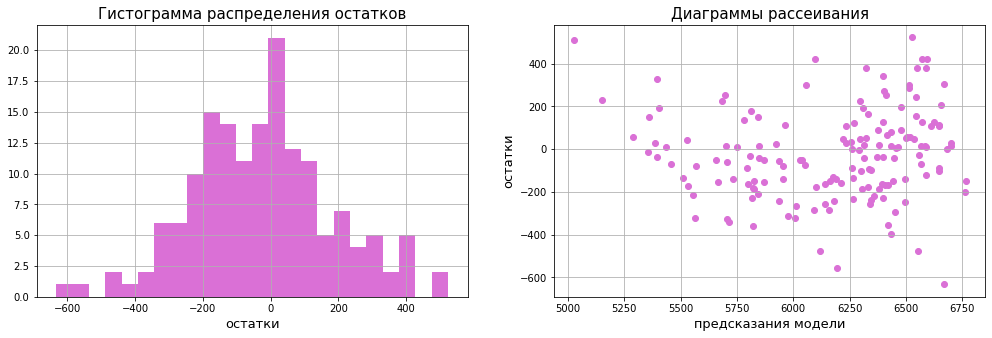

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))

axes[0].hist(bins=24, x= residuals_1, color = 'orchid')
axes[0].set_title('Гистограмма распределения остатков',fontsize=15)
axes[0].set_xlabel('остатки', fontsize=13)
axes[0].grid(True)


axes[1].scatter(x= predictions_1, y= residuals_1, color = 'orchid')
axes[1].set_title('Диаграммы рассеивания', fontsize=15)
axes[1].set_xlabel('предсказания модели',fontsize=13)
axes[1].set_ylabel('остатки',fontsize=13)
axes[1].grid(True)
plt.show()

#### Вывод:
Распределение остатков немного смещено влево, что может привести к тому, что модель может давать прогнозы, которые больше истинных значений.

По метрике R2 точность модели - 78.4 %. 

Для данной модели рекомндовано провести исследование и настроить модель на лучшее распределение, дисперсию и метрику R2.

#### МОДЕЛЬ 2. УЛУЧШЕННАЯ ВЕРСИЯ ПУТЕМ ИЗМЕНЕНИЯ ПРИЗНАКОВ

Для улучшения модели преобразуем два признака "спо" и "эке":
1. признак "cпо" преобразуем в категориальный бинарный, используя в качестве границы значение 0.92 (исходя из матрицы рассеяния).
2. признак "эке" возведём в квадрат".

In [54]:
data_main['s_p_r_bool'] = (data_main['s_p_r'] < 0.92).astype('int')
data_main['e_f_u_double'] = data_main['e_f_u'] ** 2

In [55]:
RANDOM_STATE = 42

X = data_main.drop(['yield_of_milk', 'milk_tastes', 'milk_fat', 'protein_in_milk'], axis=1)
y = data_main['yield_of_milk']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool']
num_col_names = ['crude_protein', 'e_f_u_double']

encoder_2 = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names])
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names])

encoder_col_names_2 = encoder_2.get_feature_names()

scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names])

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns= encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns= encoder_col_names_2)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns= num_col_names)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns= num_col_names)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)
predictions_2 = model_lr_2.predict(X_test_2)

residuals_2 = y_test_2 - predictions_2
r2_2 = r2_score(y_test_2, predictions_2)

print('Коэффициент детерминации R2:', r2_2)

Коэффициент детерминации R2: 0.8180879926867503


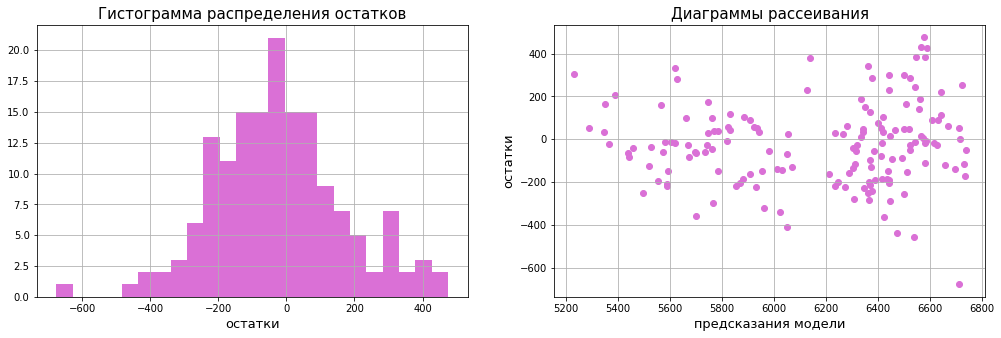

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))

axes[0].hist(bins=24, x= residuals_2, color = 'orchid')
axes[0].set_title('Гистограмма распределения остатков',fontsize=15)
axes[0].set_xlabel('остатки', fontsize=13)
axes[0].grid(True)


axes[1].scatter(x= predictions_2, y= residuals_2, color = 'orchid')
axes[1].set_title('Диаграммы рассеивания', fontsize=15)
axes[1].set_xlabel('предсказания модели',fontsize=13)
axes[1].set_ylabel('остатки',fontsize=13)
axes[1].grid(True)
plt.show()

 #### Вывод
Точность улучшенной модели - 81.8 %(лучше, чем у первой модели). В диаграмме рассеивания улучшилось распределение, но оно ещё смещено влево.Нет улучшения дисперсии. Также данная модель, как и первая, требует улучшений.

#### МОДЕЛЬ 3. УЛУЧШЕНИЕ С ПОМОЩЬЮ ДОБАВЛЕНИЯ НОВОГО ПРИЗНАКА.

Для улучшения модели добавим признак "имя папы быка" из данных data_ferma. Перед добавлением необходимо провести проверку строк в данных data_main и data_ferma.

In [57]:
print('Количество строк в data_main:',data_main.shape[0])
print('Количество строк в data_ferma:',data_ferma.shape[0])

Количество строк в data_main: 628
Количество строк в data_ferma: 628


In [58]:
data_main = data_main.merge(data_ferma, on= 'id', how= 'left')

In [59]:
RANDOM_STATE = 42

X = data_main.drop(['yield_of_milk', 'milk_tastes', 'milk_fat', 'protein_in_milk', 'e_f_u', 's_p_r'], axis=1)
y = data_main['yield_of_milk']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool', 'bull_name']
num_col_names = ['crude_protein', 'e_f_u_double']

encoder_3 = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names])

encoder_col_names_3 = encoder_3.get_feature_names()

scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names])

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns= encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns= encoder_col_names_3)
X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns= num_col_names)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns= num_col_names)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)
predictions_3 = model_lr_3.predict(X_test_3)

residuals_3 = y_test_3 - predictions_3
r2_3 = r2_score(y_test_3, predictions_3)

print('Коэффициент детерминации R2:', r2_3)

Коэффициент детерминации R2: 0.8247542745210408


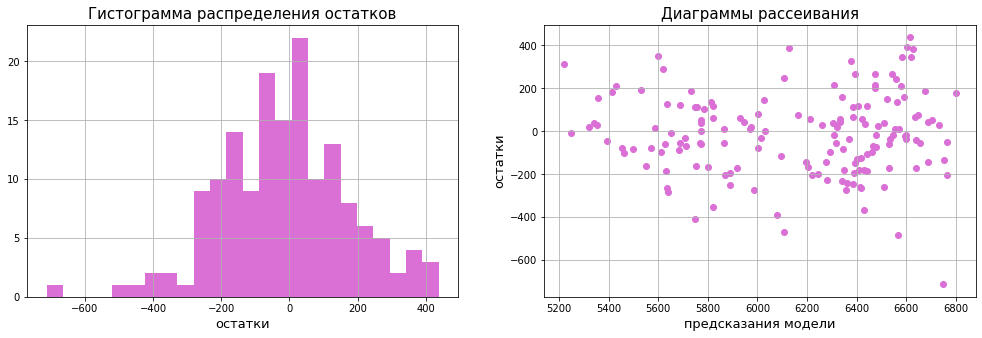

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))

axes[0].hist(bins=24, x= residuals_3, color = 'orchid')
axes[0].set_title('Гистограмма распределения остатков',fontsize=15)
axes[0].set_xlabel('остатки', fontsize=13)
axes[0].grid(True)


axes[1].scatter(x= predictions_3, y= residuals_3, color = 'orchid')
axes[1].set_title('Диаграммы рассеивания', fontsize=15)
axes[1].set_xlabel('предсказания модели',fontsize=13)
axes[1].set_ylabel('остатки',fontsize=13)
axes[1].grid(True)
plt.show()

#### Вывод
Точность улучшенной модели - 82.5 %(лучше, чем у первой и второй моделей). В диаграмме рассеивания улучшилось распределение, но оно ещё смещено влево.Есть улучшение дисперсии.

#### Проверка качества каждой модели по трём метрикам: MSE, MAE, RMSE.

In [61]:
mae_1 = mean_absolute_error(y_test_1, predictions_1)
mae_2 = mean_absolute_error(y_test_2, predictions_2)
mae_3 = mean_absolute_error(y_test_3, predictions_3)
print('МАЕ модели № 1:', mae_1)
print('МАЕ модели № 2:', mae_2)
print('МАЕ модели № 3:', mae_3)

МАЕ модели № 1: 164.24194463474916
МАЕ модели № 2: 149.039652223646
МАЕ модели № 3: 146.1630244536231


In [62]:
mse_1 = mean_squared_error(y_test_1, predictions_1)
mse_2 = mean_squared_error(y_test_2, predictions_2)
mse_3 = mean_squared_error(y_test_3, predictions_3)
print('MSE модели № 1:', mse_1)
print('MSE модели № 2:', mse_2)
print('MSE модели № 3:', mse_3)

MSE модели № 1: 43887.01500966046
MSE модели № 2: 37030.911311136944
MSE модели № 3: 35673.88988618192


In [63]:
rmse_1 = mean_squared_error(y_test_1, predictions_1, squared= False)
rmse_2 = mean_squared_error(y_test_2, predictions_2, squared= False)
rmse_3 = mean_squared_error(y_test_3, predictions_3, squared= False)
print('RMSE модели № 1:', rmse_1)
print('RMSE модели № 2:', rmse_2)
print('RMSE модели № 3:', rmse_3)

RMSE модели № 1: 209.4922791170607
RMSE модели № 2: 192.43417396901452
RMSE модели № 3: 188.87532895055912


In [64]:
interval_1 = st.norm.interval(alpha=0.95, 
                 loc=np.mean(predictions_1), 
                 scale=st.sem(predictions_1))

interval_2 = st.norm.interval(alpha=0.95, 
                 loc=np.mean(predictions_2), 
                 scale=st.sem(predictions_2))

interval_3 = st.norm.interval(alpha=0.95, 
                 loc=np.mean(predictions_3), 
                 scale=st.sem(predictions_3))

print('доврительный интервал модели № 1:', interval_1);
print('доверительный интервал модели № 2:', interval_2);
print('доверительный интервал модели № 3:', interval_3);

доврительный интервал модели № 1: (6106.009965598841, 6228.04870872839)
доверительный интервал модели № 2: (6103.09954488274, 6228.958153299152)
доверительный интервал модели № 3: (6092.340075854289, 6221.375070058381)


#### Вывод:
Исходя из сравнения метрик R2, MAE, MSE и RMSE и доверительных интервалов трёх моделей, следует , что модель № 3 наиболее точна, ее предсказания в среднем меньше отличаются от истинных значений, чем у первых двух моделей и доверительный интервал больше.

#### Прогноз удоя коров, которых фермер хочет купить

In [65]:
data_buy['s_p_r'] = data_main['s_p_r'].mean() * 1.05
data_buy['crude_protein'] = data_main['crude_protein'].mean() * 1.05
data_buy['e_f_u'] = data_main['e_f_u'].mean() * 1.05

data_buy['s_p_r_bool'] = (data_buy['s_p_r'] < 0.92).astype('int')
data_buy['e_f_u_double'] = data_buy['e_f_u'] ** 2

In [66]:
RANDOM_STATE = 42

X = data_main.drop(['yield_of_milk', 'milk_tastes', 'milk_fat', 'protein_in_milk', 'e_f_u', 's_p_r'], axis=1)
y = data_main['yield_of_milk']

X_new = data_buy.drop(['milk_fat_now','protein_in_milk_now', 'e_f_u', 's_p_r'], axis=1)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool', 'bull_name']
num_col_names = ['crude_protein', 'e_f_u_double']

encoder_3 = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names])

encoder_col_names_3 = encoder_3.get_feature_names()

scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names])

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns= encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns= encoder_col_names_3)
X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns= num_col_names)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns= num_col_names)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)

X_new_ohe = encoder_3.transform(X_new[cat_col_names])
X_new_scaled = scaler_3.transform(X_new[num_col_names])

X_new_ohe = pd.DataFrame(X_new_ohe, columns= encoder_col_names_3)
X_new_scaled = pd.DataFrame(X_new_scaled, columns= num_col_names)
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)

predictions_new = model_lr_3.predict(X_new)

In [67]:
data_buy['yield_of_milk'] = predictions_new
display(data_buy)

,breed,grassland,bull_breed,bull_name,milk_fat_now,protein_in_milk_now,age,s_p_r,crude_protein,e_f_u,s_p_r_bool,e_f_u_double,yield_of_milk
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6378.711028
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6283.999775
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6593.089377
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6542.146066
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6425.380218
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6571.259737
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6283.999775
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6400.540668


## Обучение модели логистической регрессии

In [68]:
RANDOM_STATE = 42

X_cl = data_main.drop(['yield_of_milk', 'milk_tastes', 'e_f_u', 's_p_r'], axis=1)
y_cl = data_main['milk_tastes']

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool', 'bull_name']
num_col_names = ['crude_protein', 'e_f_u_double', 'milk_fat', 'protein_in_milk']

encoder_cl = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_cl = encoder_cl.fit_transform(X_train_cl[cat_col_names])
X_test_ohe_cl = encoder_cl.transform(X_test_cl[cat_col_names])

encoder_col_names_cl = encoder_cl.get_feature_names()

scaler_cl = StandardScaler()
X_train_scaled_cl = scaler_cl.fit_transform(X_train_cl[num_col_names])
X_test_scaled_cl = scaler_cl.transform(X_test_cl[num_col_names])

X_train_ohe_cl = pd.DataFrame(X_train_ohe_cl, columns= encoder_col_names_cl)
X_test_ohe_cl = pd.DataFrame(X_test_ohe_cl, columns= encoder_col_names_cl)
X_train_scaled_cl = pd.DataFrame(X_train_scaled_cl, columns= num_col_names)
X_test_scaled_cl = pd.DataFrame(X_test_scaled_cl, columns= num_col_names)

X_train_cl = pd.concat([X_train_ohe_cl, X_train_scaled_cl], axis=1)
X_test_cl = pd.concat([X_test_ohe_cl, X_test_scaled_cl], axis=1)

y_train_cl = y_train_cl.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_cl = y_test_cl.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = OneVsRestClassifier(LogisticRegression())
clf = clf.fit(X_train_cl, y_train_cl)
y_cl_pred = clf.predict(X_test_cl)

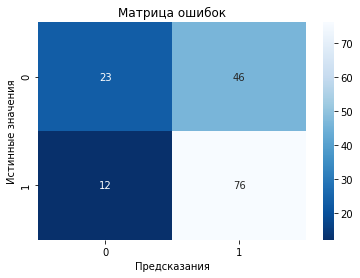

In [69]:
cm = confusion_matrix(y_test_cl, y_cl_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказания')
plt.title('Матрица ошибок');

In [70]:
acc = accuracy_score(y_test_cl, y_cl_pred)
precision = precision_score(y_test_cl, y_cl_pred)
recall = recall_score(y_test_cl, y_cl_pred)
print('Метрика Accuracy =', round(acc, 2))
print('Метрика Recall =', round(recall, 2))
print('Метрика Precision =', round(precision, 2))

Метрика Accuracy = 0.63
Метрика Recall = 0.86
Метрика Precision = 0.62


#### Вывод:
Модель вычислила правильность определения вкуса молока  - 86%(Recall = 0.86).

Для фермера важно хорошее качество молока всегда, следовательно, необходимо уменьшить ошибку ложноположительных предсказаний (ошибка, где невкусное молоко - вкусное). Необходимо улучшить метрику Precision так, чтобы не было сильного ухудшения остальных показателей. Данное улучшение производиться путем установления порога.

In [71]:
for THRESHOLD in np.arange(0,1,0.1):
    preds = np.where(clf.predict_proba(X_test_cl)[:,1] > THRESHOLD, 1, 0)
    precision_res = precision_score(y_test_cl, preds, zero_division= 1)
    acc_res = accuracy_score(y_test_cl, preds)
    print('Порог', round(THRESHOLD, 1), 'значение Precision:', round(precision_res, 2), 'значение Accuracy:', round(acc_res, 2))

Порог 0.0 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.1 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.2 значение Precision: 0.56 значение Accuracy: 0.56
Порог 0.3 значение Precision: 0.56 значение Accuracy: 0.57
Порог 0.4 значение Precision: 0.57 значение Accuracy: 0.57
Порог 0.5 значение Precision: 0.62 значение Accuracy: 0.63
Порог 0.6 значение Precision: 0.72 значение Accuracy: 0.71
Порог 0.7 значение Precision: 0.82 значение Accuracy: 0.62
Порог 0.8 значение Precision: 0.89 значение Accuracy: 0.48
Порог 0.9 значение Precision: 1.0 значение Accuracy: 0.44


#### Вывод:
Оптимальный порок равен 0.7, поскольку нет значительного падения мерики Accuracy.

In [72]:
RANDOM_STATE = 42
THRESHOLD = 0.7

X_cl = data_main.drop(['yield_of_milk', 'milk_tastes', 'e_f_u', 's_p_r'], axis=1)
y_cl = data_main['milk_tastes']

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool', 'bull_name']
num_col_names = ['crude_protein', 'e_f_u_double', 'milk_fat', 'protein_in_milk']

encoder_cl = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_cl = encoder_cl.fit_transform(X_train_cl[cat_col_names])
X_test_ohe_cl = encoder_cl.transform(X_test_cl[cat_col_names])

encoder_col_names_cl = encoder_cl.get_feature_names()

scaler_cl = StandardScaler()
X_train_scaled_cl = scaler_cl.fit_transform(X_train_cl[num_col_names])
X_test_scaled_cl = scaler_cl.transform(X_test_cl[num_col_names])

X_train_ohe_cl = pd.DataFrame(X_train_ohe_cl, columns= encoder_col_names_cl)
X_test_ohe_cl = pd.DataFrame(X_test_ohe_cl, columns= encoder_col_names_cl)
X_train_scaled_cl = pd.DataFrame(X_train_scaled_cl, columns= num_col_names)
X_test_scaled_cl = pd.DataFrame(X_test_scaled_cl, columns= num_col_names)

X_train_cl = pd.concat([X_train_ohe_cl, X_train_scaled_cl], axis=1)
X_test_cl = pd.concat([X_test_ohe_cl, X_test_scaled_cl], axis=1)

y_train_cl = y_train_cl.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_cl = y_test_cl.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = OneVsRestClassifier(LogisticRegression())
clf = clf.fit(X_train_cl, y_train_cl)

preds = np.where(clf.predict_proba(X_test_cl)[:,1] > THRESHOLD, 1, 0)

In [73]:
acc_res = accuracy_score(y_test_cl, preds)
precision_res = precision_score(y_test_cl, preds)
recall_res = recall_score(y_test_cl, preds)
print('Метрика Accuracy =', round(acc_res, 2))
print('Метрика Recall =', round(recall_res, 2))
print('Метрика Precision =', round(precision_res, 2))

Метрика Accuracy = 0.62
Метрика Recall = 0.42
Метрика Precision = 0.82


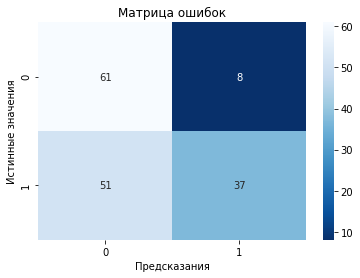

In [74]:
cm_2 = confusion_matrix(y_test_cl, preds)
sns.heatmap(cm_2, annot= True, fmt= 'd', cmap= 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказания')
plt.title('Матрица ошибок');

#### Вывод:
Для улучшения показателей был выбран порог равный 0.7. После установления порога в модель обучения была построена матрица ошибок, где метрика Метрика Accuracy = 0.62, Метрика Recall = 0.42, Метрика Precision = 0.82. По полученным данным можно сделать вывод об улучшении определения вкусного молока.

In [75]:
data_buy = data_buy.rename(
    columns ={'protein_in_milk_now':'protein_in_milk'
             ,'milk_fat_now':'milk_fat'})

In [76]:
RANDOM_STATE = 42
THRESHOLD = 0.7

X_cl = data_main.drop(['yield_of_milk', 'milk_tastes', 'e_f_u', 's_p_r'], axis=1)
y_cl = data_main['milk_tastes']

X_new_cl = data_buy.drop(['e_f_u', 's_p_r', 'yield_of_milk'], axis=1)

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, random_state= RANDOM_STATE)

cat_col_names = ['breed', 'grassland', 'bull_breed', 'age', 's_p_r_bool', 'bull_name']
num_col_names = ['crude_protein', 'e_f_u_double', 'milk_fat', 'protein_in_milk']

encoder_cl = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_cl = encoder_cl.fit_transform(X_train_cl[cat_col_names])
X_test_ohe_cl = encoder_cl.transform(X_test_cl[cat_col_names])

encoder_col_names_cl = encoder_cl.get_feature_names()

scaler_cl = StandardScaler()
X_train_scaled_cl = scaler_cl.fit_transform(X_train_cl[num_col_names])
X_test_scaled_cl = scaler_cl.transform(X_test_cl[num_col_names])

X_train_ohe_cl = pd.DataFrame(X_train_ohe_cl, columns= encoder_col_names_cl)
X_test_ohe_cl = pd.DataFrame(X_test_ohe_cl, columns= encoder_col_names_cl)
X_train_scaled_cl = pd.DataFrame(X_train_scaled_cl, columns= num_col_names)
X_test_scaled_cl = pd.DataFrame(X_test_scaled_cl, columns= num_col_names)

X_train_cl = pd.concat([X_train_ohe_cl, X_train_scaled_cl], axis=1)
X_test_cl = pd.concat([X_test_ohe_cl, X_test_scaled_cl], axis=1)

y_train_cl = y_train_cl.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_cl = y_test_cl.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = OneVsRestClassifier(LogisticRegression())
clf = clf.fit(X_train_cl, y_train_cl)

X_new_cl_ohe = encoder_cl.transform(X_new_cl[cat_col_names])
X_new_cl_scaled = scaler_cl.transform(X_new_cl[num_col_names])

X_new_cl_ohe = pd.DataFrame(X_new_cl_ohe, columns= encoder_col_names_cl)
X_new_cl_scaled = pd.DataFrame(X_new_cl_scaled, columns= num_col_names)
X_new_cl = pd.concat([X_new_cl_ohe, X_new_cl_scaled], axis=1)

preds = np.where(clf.predict_proba(X_new_cl)[:,1] > THRESHOLD, 1, 0)

In [77]:
taste = []
for pred in preds:
    if pred == 1:
        taste.append('вкусно')
    else:
        taste.append('не вкусно')
        
data_buy['milk_tastes'] = taste

In [78]:
display(data_buy)

,breed,grassland,bull_breed,bull_name,milk_fat,protein_in_milk,age,s_p_r,crude_protein,e_f_u,s_p_r_bool,e_f_u_double,yield_of_milk,milk_tastes
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6378.711028,не вкусно
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6283.999775,не вкусно
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6593.089377,не вкусно
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6542.146066,не вкусно
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6425.380218,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6571.259737,не вкусно
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6283.999775,не вкусно
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6400.540668,вкусно


## Вывод по выбору коров, согласно требованиям

In [79]:
display(data_buy.query('yield_of_milk> 6000 & milk_tastes == "вкусно"'))

,breed,grassland,bull_breed,bull_name,milk_fat,protein_in_milk,age,s_p_r,crude_protein,e_f_u,s_p_r_bool,e_f_u_double,yield_of_milk,milk_tastes
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6609.919297,вкусно
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,2019.947532,15.276162,0,233.361138,6400.540668,вкусно


#### Вывод:
Требованиям соответствуют две коровы с уникальными идентификаторами 0, 6 и 9

# Итоговый вывод

Цель данного проекта заключалась помощи молочному хозяйству при покупке животных с помощью модели машинного обучения.

На этапе Предобработке для всех данных было совершено изменение типов данных, устранение дубликатов, пропуски отсутствовали. После предобработки данных количество строк в данных из data_main и data_farme равно 629, количество строк в данных data_buy равно 20 (было принято решение не удалять дубликаты, поскольку это могут быть разные коровы).

Исследовательский анализ данных о стаде фермера и "ЭкоФермы" показал,что:

- жирность молока в молочном хозяйстве фермера(от 3.59% до 3.72%) немного больше, чем в "ЭкоФерме"(от 3.51% до 3.65%).
- содержание белка в молоке коров фермера (от 3.069% до 3.077%) сопоставимо с "Экофермой"(от 3.064% до 3.076%).
- в столбце 'Удой_кг'('yield_of_milk') датафрейма data_main был обнаружен и удалён один выброс.
- из всех количественных признаков нормальное распределение имеет только признак 'Белок, %'('protein_in_milk') в датафрейме data_main.
- по возрастному соотношению в обоих хозяйствах большинство коров возраста более 2 лет (82% в молочном хозяйстве фермера и 75% в "ЭкоФерме").

Корреляционный анализ показал, что:
- между целевым признаком "удой" и входными признаками наблюдается как линейная, так и нелинейная зависимости.
- есть зависимость между "удой" и категорическим признаком "возраст".
- на признак "Удой" сильнее всего влияют 2 признака: энергетическая кормовая единица (ЭКЕ) и сахаро-протеиновое соотношение (СПО). Они связаны нелинейно. Для избавления нелинейности СПО необходимо поставить границу и сделать из признака категорический бинарный. Ддя признака ЭКЕ ввести новый признак - ЭКЕ возвести в квадрат.
- существует положительная корреляция между признаками ЭКЕ и СПО, ЭКЕ и Жирность,%, СПО и Жирность,%.
- Поскольку на удой не влияет жирность и процентное содержание белка(матрица корреляций), их зависимости не рассматривались.

Для машинного обучения было выбрано три модели. Лучше всего показала себя модель № 3(добавление нового признака - имя папы быка). Точность модели - 82.5 % (били также проведены сравнения метрик R2, MAE, MSE и RMSE для трех моделей, где третья проявила себя лучше других).

Для улучшения показателей модели №3 был выбран порог равный 0.7. После установления порога в модель обучения была построена матрица ошибок, где метрика Метрика Accuracy = 0.62, Метрика Recall = 0.42, Метрика Precision = 0.82. По полученным данным можно сделать вывод об улучшении определения вкусного молока.

На последнем этапе было определены коровы, удой которых больше 6000 килограммов в год и вкусное молоко. Данные коровы имеют уникальный номер: 0, 6 и 9.

Рекомендации по улучшению бизнеса: с помощью машинного обучения было определно 3 коровы из 20. Это 15% от всех коров. Поскольку удой для всех коров выше 6000 килограмм в год, имеет смысл уменьшить порог на 0.6. Тогда процент коров, которых можно выбрать будет состовлять 35%(но риск увеличения ложноположительных значений тоже тогда возростет).
